In [1]:
# Importing Necessary Libraries import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Read csv file using pandas
data = pd.read_csv("transaction_dataset.csv") 
data.head(5)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
# BASIC EDA


#check shape of the dataset 
data.shape



(9841, 51)

In [4]:
# check columns of dataset 
data.columns


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [5]:

#drop Unnamed: 0, Address, Index from dataset
data = data.drop(["Unnamed: 0","Address","Index"],axis=1)


In [6]:
# Check which columns are having categorical, numerical or boolean values
 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [7]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [8]:
# check length of dataset 
print('dataset length: ',len(data))


dataset length:  9841


In [9]:
# loop through datatset to find count of unique values of each column
for x in data.columns: print(x,':',len(data[x].unique()))


FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

In [10]:
# Check for missing values in all the columnns of the dataset 
data.isnull().sum()


FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [11]:
# Correlation Matrix # Using pandas 
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


C:\Users\gts\AppData\Local\Temp/ipykernel_1796/1455174673.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\gts\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\gts\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.00,-0.03,-0.12,-0.27,-0.08,-0.08,-0.01,-0.03,-0.05,-0.02,-0.02,-0.01,0.01,-0.02,-0.06,-0.01,-0.01,-0.01,-0.10,-0.01,-0.02,-0.01,-0.00,-0.03,-0.00,0.02,0.01,-0.02,-0.02,-0.00,-0.02,nan,nan,nan,nan,0.01,-0.00,0.01,0.03,0.03,0.03,nan,nan,nan,0.01,-0.02
Avg min between sent tnx,-0.03,1.00,0.06,0.21,-0.03,-0.04,-0.01,-0.02,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01,0.00,-0.00,0.00,0.00,-0.04,-0.01,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01,0.05,nan,nan,nan,nan,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,nan,nan,0.00,0.05
Avg min between received tnx,-0.12,0.06,1.00,0.30,-0.04,-0.05,-0.01,-0.03,-0.03,-0.05,-0.01,-0.01,-0.01,-0.01,-0.04,-0.00,-0.00,-0.00,-0.06,-0.01,-0.01,-0.00,-0.00,-0.02,-0.00,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,nan,nan,nan,nan,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,nan,nan,nan,-0.02,-0.01
Time Diff between first and last (Mins),-0.27,0.21,0.30,1.00,0.15,0.15,-0.00,0.04,0.07,-0.08,-0.00,-0.01,-0.01,0.01,-0.05,0.00,0.04,0.03,0.19,0.01,0.01,0.04,0.00,0.08,0.05,-0.01,-0.01,0.04,0.08,0.02,0.32,nan,nan,nan,nan,-0.01,0.05,0.05,-0.01,-0.01,-0.01,nan,nan,nan,0.26,0.32
Sent tnx,-0.08,-0.03,-0.04,0.15,1.00,0.20,0.32,0.13,0.67,0.02,0.10,0.14,-0.00,0.23,0.03,0.03,0.01,0.02,0.73,0.24,0.16,0.01,-0.13,0.38,0.01,-0.00,-0.00,0.36,0.30,-0.01,0.22,nan,nan,nan,nan,-0.00,0.00,0.01,-0.00,-0.00,-0.00,nan,nan,nan,0.08,0.22
Received Tnx,-0.08,-0.04,-0.05,0.15,0.20,1.00,-0.00,0.65,0.16,-0.02,0.22,-0.00,0.09,0.10,0.13,0.02,0.01,0.01,0.81,0.13,0.24,0.01,0.16,0.12,0.02,-0.00,0.10,0.04,0.14,0.34,0.20,nan,nan,nan,nan,-0.00,0.02,0.02,-0.00,-0.00,-0.00,nan,nan,nan,0.04,0.20
Number of Created Contracts,-0.01,-0.01,-0.01,-0.00,0.32,-0.00,1.00,-0.00,0.08,-0.00,-0.00,-0.00,-0.00,0.14,-0.00,-0.00,-0.00,-0.00,0.28,0.02,-0.00,-0.00,-0.04,0.25,0.00,0.00,-0.00,0.15,0.19,-0.00,0.03,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,0.00,-0.00,nan,nan,nan,0.01,0.03
Unique Received From Addresses,-0.03,-0.02,-0.03,0.04,0.13,0.65,-0.00,1.00,0.16,-0.01,0.18,-0.00,0.30,0.06,0.23,0.05,0.02,0.04,0.52,0.03,0.12,0.02,0.14,0.06,0.00,0.00,0.12,0.05,0.08,0.24,0.15,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,-0.00,-0.00,nan,nan,nan,0.04,0.15
Unique Sent To Addresses,-0.05,-0.02,-0.03,0.07,0.67,0.16,0.08,0.16,1.00,0.07,0.15,0.21,-0.00,0.20,0.02,0.02,0.01,0.02,0.50,0.16,0.09,0.01,-0.11,0.15,0.01,0.00,-0.00,0.12,0.18,-0.01,0.24,nan,nan,nan,nan,-0.00,0.00,0.01,-0.00,-0.00,-0.00,nan,nan,nan,0.08,0.24
min value received,-0.02,-0.01,-0.05,-0.08,0.02,-0.02,-0.00,-0.01,0.07,1.00,0.03,0.12,0.12,0.02,0.27,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,nan,nan,nan,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,nan,nan,-0.03,-0.00


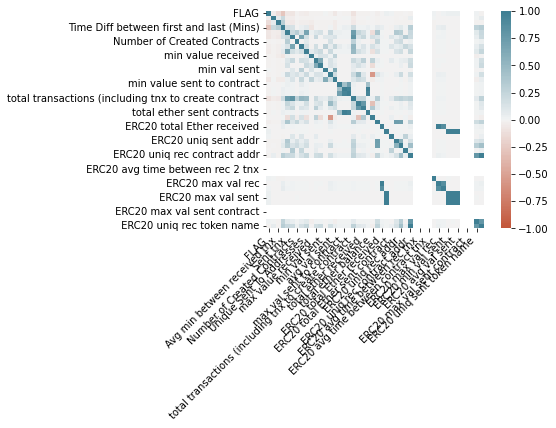

In [12]:

#Using seaborn 
ax = sns.heatmap( corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right');


array([[<AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>,
        <AxesSubplot:title={'center':'Received Tnx'}>,
        <AxesSubplot:title={'center':'Number of Created Contracts'}>],
       [<AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>,
        <AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>],
       [<AxesSubplot:title={'center':'avg val sent'}>,
        <AxesSubplot:title={'center':'min value sent to contract'}>,

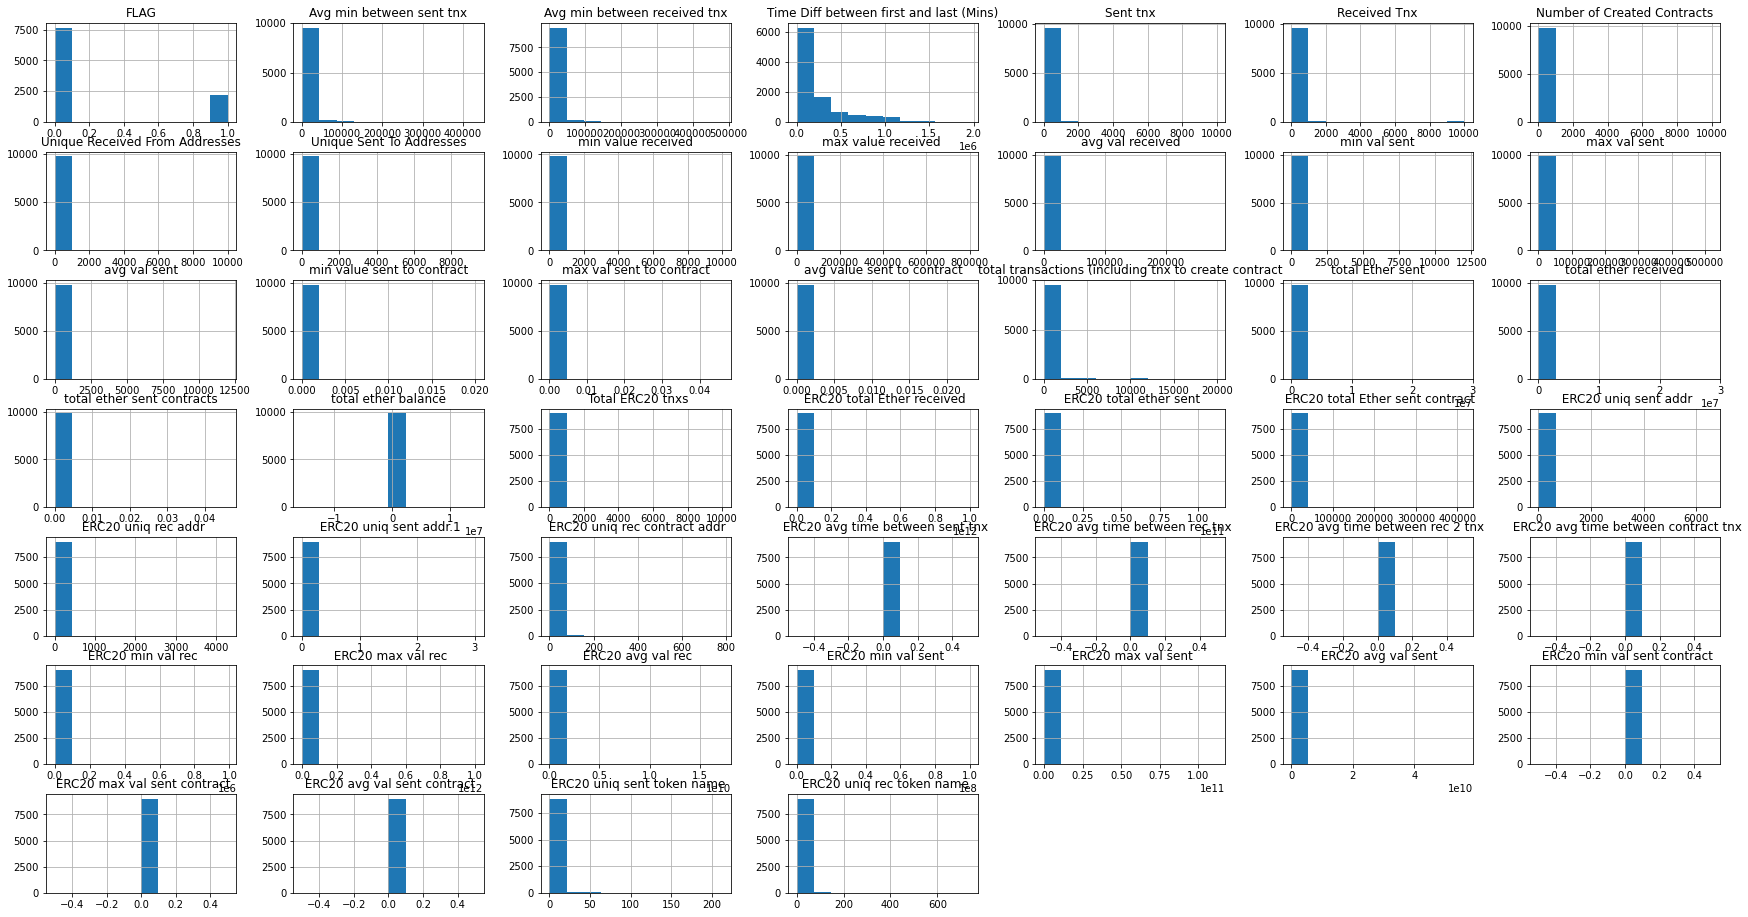

In [13]:

# CHECKING IF DATASET IS SKEWED OR NOT

#Histogram 
data.hist(figsize=(30, 16))


In [14]:

# check skewness pf dataset 
data.skew()


C:\Users\gts\AppData\Local\Temp/ipykernel_1796/3485942415.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

C:\Users\gts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


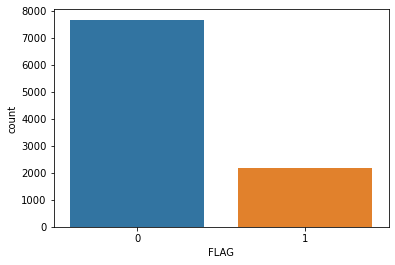

In [15]:
# CHECKING IF DATASET IS BALANCED OR NOT
# count plot of flag column 
sns.countplot(data['FLAG']) 
plt.show()


In [16]:
 
# check total number of fraudulent and non-fraudulent instances 
data['FLAG'].value_counts()


0    7662
1    2179
Name: FLAG, dtype: int64

In [17]:
# find Percentage of non-fraudulent instances
print('Percentage of non-fraudulent instances: ' + str(round(((7662/len(data)) * 100))) + '%')


Percentage of non-fraudulent instances: 78%


In [18]:

# find Percentage of fraudulent instances
print('Percentage of fraudulent instances: ' + str(round(((2179/len(data)) * 100))) + '%')



Percentage of fraudulent instances: 22%


In [19]:

# display unique values in categorical columns display(np.unique(data[' ERC20 most sent token type'].astype(str)))
display(np.unique(data[' ERC20_most_rec_token_type'].astype(str)))

array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

In [20]:
# drop categorical columns
data.drop(columns=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'], inplace=True)


In [21]:
# Replace missings of numerical variables with median 
data.fillna(data.median(), inplace=True)


In [22]:
# Filtering the features with 0 variance 
no_var = data.var() == 0 
print(data.var()[no_var])
print('\n')
 

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64




In [23]:

# Drop features with 0 variance --- these features will not help in the performance of the model
data.drop(data.var()[no_var].index, axis = 1, inplace = True) 
print(data.var())
print(data.shape)


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [24]:

# drop columns that holds only zeros and highly correlated features
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',

' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
data.drop(drop, axis=1, inplace=True)




In [25]:

# Check which columns are having categorical, numerical or boolean values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  min value sent to contract               9841 no

In [26]:

#recheck the correlation matrix corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
 


C:\Users\gts\AppData\Local\Temp/ipykernel_10468/3537375173.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\gts\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\gts\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.00,-0.03,-0.12,-0.27,-0.08,-0.08,-0.01,-0.03,-0.05,-0.02,-0.02,-0.01,0.01,-0.02,-0.06,-0.01,-0.01,-0.01,-0.10,-0.01,-0.02,-0.01,-0.00,-0.03,-0.00,0.02,0.01,-0.02,-0.02,-0.00,-0.02,nan,nan,nan,nan,0.01,-0.00,0.01,0.03,0.03,0.03,nan,nan,nan,0.01,-0.02
Avg min between sent tnx,-0.03,1.00,0.06,0.21,-0.03,-0.04,-0.01,-0.02,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01,0.00,-0.00,0.00,0.00,-0.04,-0.01,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01,0.05,nan,nan,nan,nan,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,nan,nan,0.00,0.05
Avg min between received tnx,-0.12,0.06,1.00,0.30,-0.04,-0.05,-0.01,-0.03,-0.03,-0.05,-0.01,-0.01,-0.01,-0.01,-0.04,-0.00,-0.00,-0.00,-0.06,-0.01,-0.01,-0.00,-0.00,-0.02,-0.00,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,nan,nan,nan,nan,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,nan,nan,nan,-0.02,-0.01
Time Diff between first and last (Mins),-0.27,0.21,0.30,1.00,0.15,0.15,-0.00,0.04,0.07,-0.08,-0.00,-0.01,-0.01,0.01,-0.05,0.00,0.04,0.03,0.19,0.01,0.01,0.04,0.00,0.08,0.05,-0.01,-0.01,0.04,0.08,0.02,0.32,nan,nan,nan,nan,-0.01,0.05,0.05,-0.01,-0.01,-0.01,nan,nan,nan,0.26,0.32
Sent tnx,-0.08,-0.03,-0.04,0.15,1.00,0.20,0.32,0.13,0.67,0.02,0.10,0.14,-0.00,0.23,0.03,0.03,0.01,0.02,0.73,0.24,0.16,0.01,-0.13,0.38,0.01,-0.00,-0.00,0.36,0.30,-0.01,0.22,nan,nan,nan,nan,-0.00,0.00,0.01,-0.00,-0.00,-0.00,nan,nan,nan,0.08,0.22
Received Tnx,-0.08,-0.04,-0.05,0.15,0.20,1.00,-0.00,0.65,0.16,-0.02,0.22,-0.00,0.09,0.10,0.13,0.02,0.01,0.01,0.81,0.13,0.24,0.01,0.16,0.12,0.02,-0.00,0.10,0.04,0.14,0.34,0.20,nan,nan,nan,nan,-0.00,0.02,0.02,-0.00,-0.00,-0.00,nan,nan,nan,0.04,0.20
Number of Created Contracts,-0.01,-0.01,-0.01,-0.00,0.32,-0.00,1.00,-0.00,0.08,-0.00,-0.00,-0.00,-0.00,0.14,-0.00,-0.00,-0.00,-0.00,0.28,0.02,-0.00,-0.00,-0.04,0.25,0.00,0.00,-0.00,0.15,0.19,-0.00,0.03,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,0.00,-0.00,nan,nan,nan,0.01,0.03
Unique Received From Addresses,-0.03,-0.02,-0.03,0.04,0.13,0.65,-0.00,1.00,0.16,-0.01,0.18,-0.00,0.30,0.06,0.23,0.05,0.02,0.04,0.52,0.03,0.12,0.02,0.14,0.06,0.00,0.00,0.12,0.05,0.08,0.24,0.15,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,-0.00,-0.00,nan,nan,nan,0.04,0.15
Unique Sent To Addresses,-0.05,-0.02,-0.03,0.07,0.67,0.16,0.08,0.16,1.00,0.07,0.15,0.21,-0.00,0.20,0.02,0.02,0.01,0.02,0.50,0.16,0.09,0.01,-0.11,0.15,0.01,0.00,-0.00,0.12,0.18,-0.01,0.24,nan,nan,nan,nan,-0.00,0.00,0.01,-0.00,-0.00,-0.00,nan,nan,nan,0.08,0.24
min value received,-0.02,-0.01,-0.05,-0.08,0.02,-0.02,-0.00,-0.01,0.07,1.00,0.03,0.12,0.12,0.02,0.27,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,nan,nan,nan,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,nan,nan,-0.03,-0.00


In [27]:
# check columns of dataset 
data.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

In [28]:
# Box plot


# box plot using pandas
# box plot for Avg min between sent tnx column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['Avg min between sent tnx'])


{'whiskers': [<matplotlib.lines.Line2D at 0x18a41f00cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x18a4209f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a41f00880>],
 'medians': [<matplotlib.lines.Line2D at 0x18a4209fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a4209fe20>],
 'means': []}

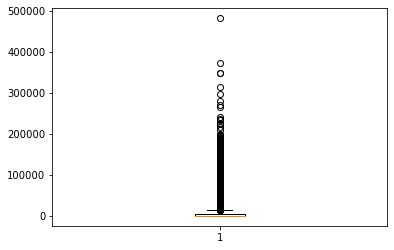

In [29]:

# box plot using pandas
# box plot for Avg min between received tn column plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Avg min between received tnx'])



{'whiskers': [<matplotlib.lines.Line2D at 0x18a4211e280>,
 'caps': [<matplotlib.lines.Line2D at 0x18a4211e9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a4210ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x18a4212d100>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a4212d490>],
 'means': []}

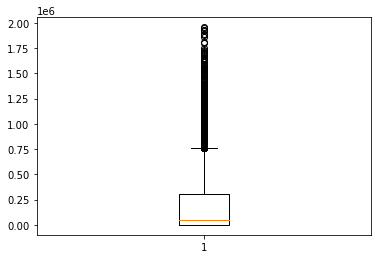

In [30]:

# box plot using pandas
# box plot for Time Diff between first and last (Mins) column plt.figure(figsize=(20, 9))
plt.boxplot(x=data['Time Diff between first and last (Mins)'])





In [31]:

# box plot using pandas
# box plot for Sent tnx column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['Sent tnx'])
 


In [32]:
# box plot using pandas
# box plot for Received Tnx column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['Received Tnx'])


In [33]:

# box plot using pandas
# box plot for max value received column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['max value received '])


In [34]:
# box plot using pandas
# box plot for vg val received column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['avg val received'])



In [35]:

# box plot using pandas
# box plot for avg val sent column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['avg val sent'])



In [36]:
# box plot using pandas
# box plot for total Ether sent column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['total Ether sent'])
 

In [37]:
# box plot using pandas
# box plot for total ether balance column plt.figure(figsize=(20, 9)) plt.boxplot(x=data['total ether balance'])


{'whiskers': [<matplotlib.lines.Line2D at 0x18a4219c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18a4219caf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a4219c040>],
 'medians': [<matplotlib.lines.Line2D at 0x18a421a7250>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a421a75e0>],
 'means': []}

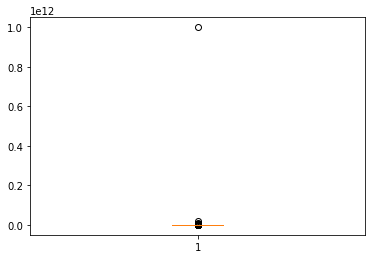

In [38]:

# box plot using pandas
# box plot for ERC20 total Ether received column plt.figure(figsize=(20, 9))
plt.boxplot(x=data[' ERC20 total Ether received'])



{'whiskers': [<matplotlib.lines.Line2D at 0x18a43e3a130>,
 'caps': [<matplotlib.lines.Line2D at 0x18a43e3a850>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a421fdd60>],
 'medians': [<matplotlib.lines.Line2D at 0x18a43e3af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a43e45340>],
 'means': []}

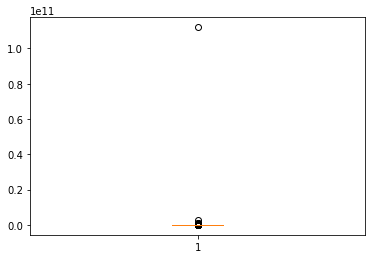

In [39]:

# box plot using pandas
# box plot for ERC20 total ether sent column plt.figure(figsize=(20, 9))
plt.boxplot(x=data[' ERC20 total ether sent'])




{'whiskers': [<matplotlib.lines.Line2D at 0x18a47183d60>,
 'caps': [<matplotlib.lines.Line2D at 0x18a471924c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a471839d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18a47192be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a47192f70>],
 'means': []}

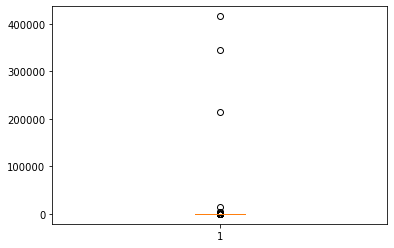

In [40]:

# box plot using pandas
# box plot for ERC20 total Ether sent contract column plt.figure(figsize=(20, 9))
plt.boxplot(x=data[' ERC20 total Ether sent contract'])


{'whiskers': [<matplotlib.lines.Line2D at 0x18a471ea700>,
 'caps': [<matplotlib.lines.Line2D at 0x18a471eae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a471ea370>],
 'medians': [<matplotlib.lines.Line2D at 0x18a471f5580>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a471f5910>],
 'means': []}

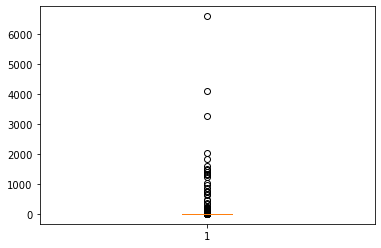

In [41]:

# box plot using pandas
# box plot for ERC20 uniq sent addr column plt.figure(figsize=(20, 9)) 
plt.boxplot(x=data[' ERC20 uniq sent addr'])
 


{'whiskers': [<matplotlib.lines.Line2D at 0x18a472571c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18a472578e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a47248df0>],
 'medians': [<matplotlib.lines.Line2D at 0x18a47264040>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a472643d0>],
 'means': []}

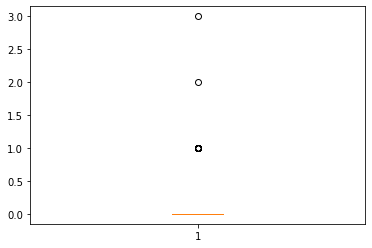

In [42]:

# box plot using pandas
# box plot for ERC20 uniq sent addr.1 column plt.figure(figsize=(20, 9))
plt.boxplot(x=data[' ERC20 uniq sent addr.1'])



{'whiskers': [<matplotlib.lines.Line2D at 0x18a472b5b80>,
 'caps': [<matplotlib.lines.Line2D at 0x18a472c52e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a472b57f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18a472c5a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a472c5d90>],
 'means': []}

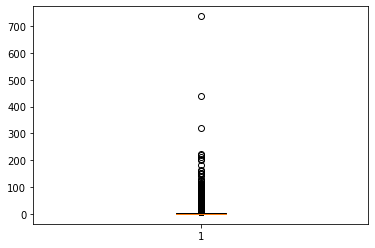

In [43]:

# box plot using pandas
# box plot for RC20 uniq rec token name column plt.figure(figsize=(20, 9))
plt.boxplot(x=data[' ERC20 uniq rec token name'])



In [44]:

# DATA PREPROCESSING
## Split the labels and the target


X = data.drop(['FLAG'], axis=1) 
y = data['FLAG']
#check the shape print(X.shape, y.shape)


In [45]:

# import train test split
from sklearn.model_selection import train_test_split




# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
 
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)



(7872, 18) (7872,)
(1969, 18) (1969,)


In [46]:
# HANDLING SKEWNESS


# import pipeline #import standaer scalar # import simple imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

# create pipeline # 1.simple imputer
# 2. standard scalar 
preprocessing_pipeline = Pipeline([('impoter', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

# fit the pipline on train data
X_train = preprocessing_pipeline.fit_transform(X_train)




In [47]:
# HANDLING IMBALANCE


# import SMOTE module from imblearn library
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE 
# Instantiate
sm = SMOTE(random_state = 2) #fit on train data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
# printthe shape of X_train After OverSampling
print('After OverSampling, the shape of X_train:{}'.format(X_train_res.shape))

# printthe shape of y_train After OverSampling 
print('After OverSampling, the shape of y_train: {}\n'.format(y_train_res.shape))



ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\gts\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:


# MODELING


# importing necessary libraries for geting metrics of models import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




# Function for calculating all the relevant metrics 
def print_score(m):
    res = classification_report(y_test,m.predict(X_test)) 
    print("Classification Report \n",res)
 



In [ ]:


# Visualize importance of all the features in the dataset for the prediction


def visualize_importance(feature_importances, feat_train_df):
    # creating dataframe for feature name and feature importance 
    feature_importance_df = pd.DataFrame()
    _df = pd.DataFrame()
    _df['feature_importances'] = feature_importance_df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df],axis=0, ignore_index=True)
    # grouping all data and sorting in descending order 
    order = feature_importance_df.groupby('column').sum()[['feature_importances']].sort_values('feature_importances', ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25))) 
    sns.boxenplot(data=feature_importance_df,x='feature_importances', y='column',order=order, ax=ax, palette='viridis', orient='h')
    ax.tick_params(axis='x', rotation=0) 
    ax.set_title('Importance')
    ax.grid() 
    fig.tight_layout() 
    return fig, ax


In [ ]:

# Logistic Regression

# Fit a logistic Regression model to the train dataset
# Import logisticRegressor
from sklearn.linear_model import LogisticRegression


# Instantiate the model 
log_class = LogisticRegression()

# fitting the model on train data 
log_class.fit(X_train_res, y_train_res)
 
# print score of the model 
print_score(log_class)

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)


In [ ]:

# Random Forest Classifier

# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)


# fitting the model on train data 
rf_clf.fit(X_train_res, y_train_res)

# print score of the model 
print_score(rf_clf)

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances, X)
 


In [ ]:



# Decision Tree Classifier

# Fit a DecisionTreeClassifier model to the train dataset



#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
dt_clf = DecisionTreeClassifier()
# fitting the model on train data 
dt_clf.fit(X_train_res,y_train_res)

# print score of the model 
print_score(dt_clf)


# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_, X)



In [ ]:



# Hyper parameter tunning
 
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid): 
    from sklearn.model_selection import RandomizedSearchCV
    # Random search of parameters, using 3 fold cross validation,
    # search across 100 different combinations, and use all available cores
    random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model random.fit(X_train[1:50], Y_train[1:50]) random.best_params_
    # for random forest classifier
    # create parameters dict for tunning
    rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 2, stop = 20, num = 3)],
                    'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(1, 6, num = 2)], 
                    'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 
                    'bootstrap': [True, False]}
    # passing data for hyper parameter tunning with Randomized search cv
    random_Search(RandomForestClassifier(),X_train_res, y_train_res, param_grid=rf_para_grid)
    # for decision tree classifier
    # create parameters dict for tunning 
    DTR_para_grid = {"splitter":["best","random"],
                 "max_depth" : [1,3,5,7,9,11,12],
                 "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                 "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
                 "max_features":["auto","log2","sqrt",None], 
                 "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
    # passing data for hyper parameter tunning with Randomized search cv
    random_Search(DecisionTreeClassifier(),X_train_res, y_train_res, param_grid = DTR_para_grid)



In [ ]:

# working with test data




# Prepare the test dataset i.e do all the transformation that was done on train dataset by callingthe helper function
X_test = preprocessing_pipeline.transform(X_test)
 


In [ ]:

"""# Perforn the prediction on the test dataset using random forest classifier model
test_prediction_rf = rf_clf.predict(X_test)


# display confusion matrix
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test,
cmap=plt.cm.Blues, normalize='true')"""


In [ ]:

# print Area under ROC of Model On Test Set
score = metrics.roc_auc_score(y_test, test_prediction_rf)


print(f'Area under ROC of Model On Test Set - {score:,.2%}')


In [ ]:


"""# Perforn the prediction on the test dataset using decision tree classifier model
test_prediction_dt = dt_clf.predict(X_test)


# display confusion matrix
disp = metrics.plot_confusion_matrix(dt_clf, X_test, y_test, #	display_labels=class_names,
cmap=plt.cm.Blues, normalize='true')"""

In [ ]:
# print Area under ROC of Model On Test Set
 
score = metrics.roc_auc_score(y_test, test_prediction_dt)


print(f'Area under ROC of Model On Test Set - {score:,.2%}')


random forest classifier is working better.


In [3]:

# Create a dataframe with predicted result as data using best model
predictions = pd.DataFrame(test_prediction_rf)


predictions.head(15)


predictions.tail(15)


NameError: name 'test_prediction_rf' is not defined